<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Zeitreihenanalyse - Neuronale Netze RNN - LSTM - Sinus
</b></font> </br></p>

---


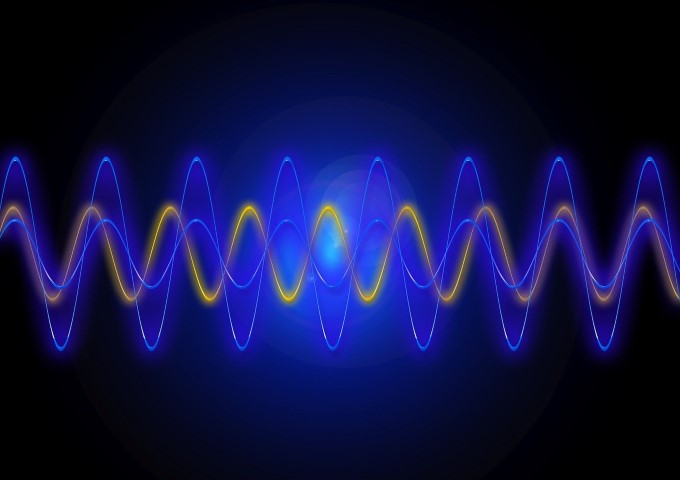

Bild von <a href="https://pixabay.com/de/users/geralt-9301/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=567757">Gerd Altmann</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=567757">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


Ein synthetischer Datensatz, der 10 Merkmale enthät und den Verlauf einer Sinuskurve hat

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Synthetische Daten Sinus</font> </br></p>
def create_dataframe(n_samples, cycles=5):
    """
    Erstellt einen DataFrame mit n_samples Datenpunkten, wobei die Zielgröße
    eine Sinuskurve repräsentiert und die Merkmale M1-M10 darauf basierende Transformationen sind.

    Parameters:
    - n_samples: int, die Anzahl der zu generierenden Datenpunkte.

    Returns:
    - df: pandas DataFrame, der die generierten Daten enthält.
    """
    import numpy as np
    import pandas as pd
    # Basis für die Zielgröße
    time = np.linspace(0, cycles * 2 * np.pi, n_samples)
    target = np.sin(time)  # Zielgröße

    # Erzeugen von Merkmalen, die direkt oder indirekt von der Zielgröße abgeleitet sind
    features = {
        'M1': np.sin(time),
        'M2': np.cos(time),
        'M3': np.sin(time)**2,
        'M4': np.cos(time)**2,
        'M5': np.sin(time + np.pi/4),
        'M6': np.sin(time - np.pi/4),
        'M7': np.cos(time + np.pi/4),
        'M8': np.cos(time - np.pi/4),
        'M9': np.sin(2*time),
        'M10': np.cos(2*time)
    }

    # Erstellen des DataFrames
    data = pd.DataFrame(features)
    data['target'] = target

    return data

In [ ]:
# Erzeugen von x Datenpunkten mit y Zyklen
# Beispiel: 52 Woche x 5 Jahre → 260, 5
data = create_dataframe(520, 10)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis)   
</font></p>

<p><font color='black' size="4">
Visualisierung der Daten
</font></p>

In [ ]:
import plotly.express as px
fig = px.line(data, y='target', title="Grundprinzip", width=1000, height=500)
fig.show()

In [ ]:
target = data.pop('target')

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Übergreifende Parameter
</font></p

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

In [ ]:
past_steps = 1
future_steps = 1
num_features = 10


<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, shuffle=False)
data_train.shape, data_test.shape, target_train.shape, target_test.shape


<p><font color='black' size="5">
Aufbau der Zeitscheiben
</font></p>

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(data_train, target_train, length=past_steps, batch_size=future_steps)

# # Beispiel erste Zeitscheibe
x, y = generator[0]
print(x.shape, y.shape)

<p><font color='black' size="5">
Modellaufbau
</font></p>

[Core layers](https://keras.io/api/layers/core_layers/)    
[Recurrent layers](https://keras.io/api/layers/recurrent_layers/)   
[Layer activation functions](https://keras.io/api/layers/activations/)   


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [ ]:
model = Sequential(name="Zeitreihenanalyse")
model.add(Input(shape=(past_steps, num_features)))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(1))

In [ ]:
model.summary()


<p><font color='black' size="5">
Compile
</font></p>

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

<p><font color='black' size="5">
Callbacks
</font></p>

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early = EarlyStopping(monitor='mae', patience=2)
check = ModelCheckpoint(filepath='model.keras', monitor='mae', save_best_only=True)

<p><font color='black' size="5">
Training
</font></p>

In [ ]:
model.fit(generator, epochs=5, batch_size=256, callbacks=[early, check])

In [ ]:
save_history = model.history.history

<p><font color='black' size="5">
Loss-Entwickung
</font></p>

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=save_history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
### Bestes Modell laden
from keras.models import load_model
model = load_model('model.keras')

In [ ]:
# Einfache Vorhersage: Istdaten aus dem TestSet (Merkmale) werden werden zur Vorhersage eines Monats verwendet
prediction_generator = TimeseriesGenerator(data_test.values, target_test.values, length=past_steps, batch_size=future_steps)

# Beispiel erste Zeitscheibe
x, y = prediction_generator[0]
print(x.shape, y.shape)

In [ ]:
# Vorhersagen machen
predictions = model.predict(prediction_generator)

In [ ]:
predictions.shape

<p><font color='black' size="5">
Vergleich Zeitreihen
</font></p>

In [ ]:
import pandas as pd
cube = pd.DataFrame(target_test[1:]) # Target ist 1 Periode zu lang
cube['Predict'] = predictions

In [ ]:
fig = px.line(cube, y=['target', 'Predict'], title="Zeitreihenanalyse - Target vs. Predict", width=1200, height=500)
fig.show()

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>